In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv('seattle-weather.csv')
df.sample(5) 

,date,precipitation,temp_max,temp_min,wind,weather
749,2014-01-19,0.0,6.1,3.3,2.5,sun
759,2014-01-29,21.6,11.1,7.2,3.4,rain
974,2014-09-01,0.0,23.3,12.8,2.5,sun
1132,2015-02-06,17.3,14.4,10.0,4.5,rain
1390,2015-10-22,0.0,16.1,8.9,2.7,fog


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [30]:
train_df, val_df = train_test_split(df, test_size = .20, random_state = 1000)

In [31]:
val_df.shape

(293, 6)

In [32]:
train_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
1318,2015-08-11,0.0,30.0,16.7,4.4,sun
415,2013-02-19,0.0,10.6,1.7,3.4,sun
314,2012-11-10,0.0,7.8,-0.6,2.2,sun
747,2014-01-17,0.0,5.6,2.8,2.3,sun
1277,2015-07-01,0.0,32.2,17.2,4.3,sun


In [33]:
X = train_df.drop(columns=['date', 'weather'])
y = train_df['weather']


In [34]:
X.columns.tolist()

['precipitation', 'temp_max', 'temp_min', 'wind']

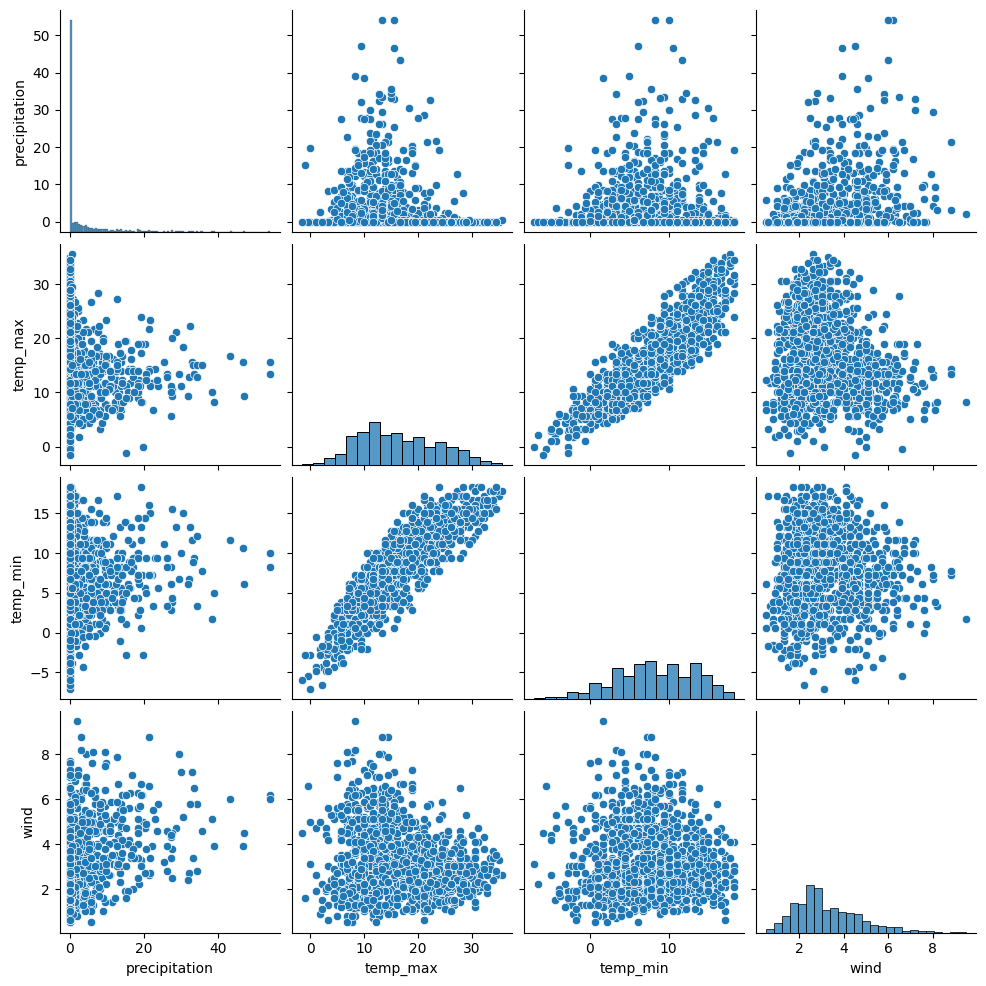

In [35]:
sns.pairplot(train_df)

In [36]:
X.skew()

precipitation    3.297382
temp_max         0.285073
temp_min        -0.258260
wind             0.898588
dtype: float64

In [37]:
X.mean()

precipitation     3.204195
temp_max         16.370890
temp_min          8.198373
wind              3.242637
dtype: float64

In [45]:
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(C = 1.0)
)
    
clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [46]:
train_df = cross_val_score(clf, X = X, y = y, cv = 5)
train_df.mean()

np.float64(0.774846850812516)

In [48]:
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(C = 100)
)
    
clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=100))])

In [57]:
X_val = val_df.drop(columns=['date', 'weather'])
y_val = val_df['weather']
clf.predict(X_val)

array(['rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain',
       'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'snow', 'sun',
       'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun',
       'rain', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'rain', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'rain',

In [50]:
clf.score(X_val, y_val)

0.8805460750853242